<h1>Combining College wise Loan amount from FAFSA and College Tuition details</h1>
<br> Trying to map the college names in Loan database and tuition database to match the nearset string as 
college names are not universally same. 
<br> Filtering Tuition data
<br>

In [227]:
# Sample tuition data
college_tuition_df = pd.read_csv("data/college-tuition/MERGED2012_13_PP.csv",  encoding='latin-1')
college_tuition_df[['INSTNM','CITY','STABBR', 'COSTT4_A']].head()

,INSTNM,CITY,STABBR,COSTT4_A
0,Alabama A & M University,Normal,AL,17351.0
1,University of Alabama at Birmingham,Birmingham,AL,20441.0
2,Amridge University,Montgomery,AL,11420.0
3,University of Alabama in Huntsville,Huntsville,AL,19687.0
4,Alabama State University,Montgomery,AL,17533.0


In [ ]:
import pandas as pd
from difflib import get_close_matches

In [223]:
def fuzzyMap(x, collegeList):
    try:
        x = get_close_matches(x, collegeList)[0]
        return x
    except:
        return "None"
    
def join_tuition_loan_per_college(tuition_filename, loan_filename):
    college_tuition_df = pd.read_csv(tuition_filename,  encoding='latin-1')
    college_tuition_df['INSTNM'] = college_tuition_df['INSTNM'].map(lambda x : x.lower())
    college_tuition_df = college_tuition_df[['INSTNM','CITY','STABBR', 'COSTT4_A']]
    college_tuition_df.dropna(inplace=True)
    regionCode = pd.read_csv("data/college-region/Mapping Colleges to regions - Sheet1.csv" , sep= ",", encoding='latin-1')  

    regionCode.dropna(inplace=True)
    regionCode['college'] = regionCode['college'].map(lambda x : x.lower())
    regionList = list(regionCode['college'])
    college_tuition_df['INSTNM'] = college_tuition_df['INSTNM'].map(lambda x: fuzzyMap(x, regionList))
    college_tuition_df = college_tuition_df[college_tuition_df['INSTNM'] != 'None']
    
    regionCode.set_index('college', inplace=True)
    college_tuition_df.set_index('INSTNM', inplace=True)
    df = regionCode.join(college_tuition_df)
    df.dropna(inplace=True)
    df = df[df['State'] == df['STABBR']]
    
    
    loanData = pd.read_excel(loan_filename, encoding='latin-1')
    loanData['School'] = loanData['School'].map(lambda x : x.lower())
    loan_tuition = loanData.merge(df, how='left', left_on = 'School', right_index = True).dropna()
    return loan_tuition

# high time consuming processing -> uncomment to regenerate
# loan_tuition_2012 = join_tuition_loan_per_college("data/college-tuition/MERGED2012_13_PP.csv","data/college-loan/2012-13CampusBasedFunding.xls")
# loan_tuition_2013 = join_tuition_loan_per_college("data/college-tuition/MERGED2013_14_PP.csv","data/college-loan/2013-14CampusBased.xls")
# loan_tuition_2014 = join_tuition_loan_per_college("data/college-tuition/MERGED2014_15_PP.csv","data/college-loan/2014-15CampusBased.xls")



/Users/shrutika/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (6,1169,1170,1171,1172,1173,1174,1175,1177,1178,1179,1180,1183,1184,1185,1186,1187,1188,1196,1199,1200,1209,1212,1213,1222,1223,1224,1225,1226,1227,1235,1236,1237,1238,1239,1240,1248,1251,1252,1253,1255,1257,1261,1264,1265,1266,1268,1270,1274,1275,1276,1277,1278,1279,1281,1287,1288,1289,1290,1291,1292,1294,1303,1304,1316,1317,1326,1327,1328,1329,1330,1331,1335,1339,1340,1341,1342,1343,1344,1348,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1411,1426,1427,1475,1476,1479,1480,1483,1484,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1517,1529,1530,1532,1537,1540,1541,1542,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1606,1609,1610,1613,1614,1615,17

In [368]:

loan_tuition_2012.to_csv("data/string-processed/loan_tuition_2012.csv")
loan_tuition_2013.to_csv("data/string-processed/loan_tuition_2013.csv")
loan_tuition_2014.to_csv("data/string-processed/loan_tuition_2014.csv")
loan_tuition_2012.head()

,OPE ID,School,State_x,Zip Code,School Type,FEDERAL WORK Recipients,FEDERAL WORK $ Federal Award,FEDERAL WORK Disbursements,PERKINS LOAN Recipients,PERKINS LOAN $ Federal Award,PERKINS LOAN Disbursements,FEDERAL SUPPLEMENTAL Recipients,FEDERAL SUPPLEMENTAL $ Federal Award,FEDERAL SUPPLEMENTAL Disbursements,State_y,region,CITY,STABBR,COSTT4_A
0,884300,alaska bible college,AK,99588-0000,Private/Non-Profit,10,5000,6933,0,0,0,17,5000,6400,AK,Northern,Palmer,AK,10730.0
1,4138600,alaska christian college,AK,99669-9755,Private/Non-Profit,8,5000,5000,0,0,0,10,5000,5000,AK,Anchorage,Soldotna,AK,15994.0
2,106100,alaska pacific university,AK,99508-4672,Private/Non-Profit,39,45110,52175,0,0,0,88,34279,43306,AK,South Central,Anchorage,AK,40883.0
3,2576900,charter college,AK,99508-4103,Proprietary,86,200000,188703,0,0,0,1093,306747,487503,WA,Region 3,Vancouver,WA,23557.0
4,3461300,ilisagvik college,AK,99723-0749,Public,11,27453,23200,0,0,0,27,22224,25165,AK,Anchorage,Barrow,AK,11902.0


<h1>Cleaning Student Loan Data from FAFSA</h1>
<br>Includes aggreagting the students and Total Amount of Loan per state
<br>Map the state abbrevations to 

In [490]:
import pandas as pd
def clean_college_loan_data(loan_data):
    loan_data = loan_data.drop(['State_y', 'STABBR'], axis=1)
    loan_data = loan_data.rename(columns={"State_x": "State", "COSTT4_A": "TuitionAmount"})

    state_names_df = pd.read_excel("data/state-names-abb/StateNames.xlsx") 
    state_name = []
    for state in loan_data["State"]:
        state_ser = state_names_df[state_names_df["abb"] == str(state)]
        if(state_ser.empty):
            state_name.append("None")
        else:
            state_name.append(str(state_ser.iloc[0]['name']))

    loan_data["State"] =   state_name
    loan_data = loan_data[loan_data["State"] != "None"]
    stripping = loan_data['School'].str.strip()
    loan_data['School']= stripping
    loan_data["total_recipients"] = loan_data["FEDERAL WORK Recipients"]+loan_data["PERKINS LOAN Recipients"]
    loan_data["total_loan_disbursment_amount"] = loan_data["FEDERAL WORK Disbursements"]+loan_data["PERKINS LOAN Disbursements"]         

    return loan_data

In [491]:

loan_data2012 = pd.read_csv("data/college-loan/Loan&Tuition12_13.csv", sep= ",", encoding='latin-1')  
loan_data2012 = clean_college_loan_data(loan_data2012)

loan_data2013 = pd.read_csv("data/college-loan/Loan&Tuition13_14.csv", sep= ",", encoding='latin-1')  
loan_data2013 = clean_college_loan_data(loan_data2013)

loan_data2014 = pd.read_csv("data/college-loan/Loan&Tuition14_15.csv", sep= ",", encoding='latin-1')  
loan_data2014 = clean_college_loan_data(loan_data2014)


<h3> Sample Loan and  Tuition data for every college</h3>

In [492]:
loan_data2012.head()

,Unnamed: 0,OPE ID,School,State,Zip Code,School Type,FEDERAL WORK Recipients,FEDERAL WORK $ Federal Award,FEDERAL WORK Disbursements,PERKINS LOAN Recipients,PERKINS LOAN $ Federal Award,PERKINS LOAN Disbursements,FEDERAL SUPPLEMENTAL Recipients,FEDERAL SUPPLEMENTAL $ Federal Award,FEDERAL SUPPLEMENTAL Disbursements,Region,CITY,TuitionAmount,total_recipients,total_loan_disbursment_amount
0,0,884300,alaska bible college,Alaska,99588-0000,Private/Non-Profit,10,5000,6933,0,0,0,17,5000,6400,Northern,Palmer,10730,10,6933
1,1,4138600,alaska christian college,Alaska,99669-9755,Private/Non-Profit,8,5000,5000,0,0,0,10,5000,5000,Anchorage,Soldotna,15994,8,5000
2,2,106100,alaska pacific university,Alaska,99508-4672,Private/Non-Profit,39,45110,52175,0,0,0,88,34279,43306,South Central,Anchorage,40883,39,52175
3,3,2576900,charter college,Alaska,99508-4103,Proprietary,86,200000,188703,0,0,0,1093,306747,487503,Region 3,Vancouver,23557,86,188703
4,4,3461300,ilisagvik college,Alaska,99723-0749,Public,11,27453,23200,0,0,0,27,22224,25165,Anchorage,Barrow,11902,11,23200


<h1>Cleaning Region wise Depression Data from SAMHASA</h1>
<br> Collecting only the region wise data and eleminating the state wise data

In [493]:
depression_data = pd.read_excel("data/region-depression/2012-2014_Substate_SAE_Table_.xlsx")
# Selecting Map Group =4 => maps all the sub regions to depression index
depression_data = depression_data[depression_data["Map Group"]== 4]

column_names = ['State', 'Substate Region']
depression_data = pd.melt(depression_data, id_vars=column_names,\
                          value_vars=['Depression2012','Depression2013','Depression2014'])

mapping = {"Depression2012": 2012, "Depression2013": 2013, "Depression2014": 2014}
depression_data = depression_data.replace({"variable": mapping})

<h1>Cleaning College Region Data </h1>
<br> Collecting only the region wise data and eleminating the state wise data

In [494]:
college_region_mapping_df = pd.read_csv("data/college-region/Mapping Colleges to regions - Sheet1.csv" , sep= ",", encoding='latin-1')  
state_name = []
state_names_df = pd.read_excel("data/state-names-abb/StateNames.xlsx") 
for state in college_region_mapping_df["State"]:
    state_ser = state_names_df[state_names_df["abb"] == str(state)]
    if(state_ser.empty):
        state_name.append("None")
    else:
        state_name.append(str(state_ser.iloc[0]['name']))

college_region_mapping_df["State"] = state_name
college_region_mapping_df = college_region_mapping_df[college_region_mapping_df["State"] != "None"]
stripping = college_region_mapping_df['college'].str.strip()
college_region_mapping_df['college']= stripping
college_region_mapping_df.dropna(inplace = True)
college_region_mapping_df['college'] = college_region_mapping_df['college'].map(lambda x : x.lower())
college_region_mapping_df.head()

,college,State,region
0,alaska pacific university,Alaska,South Central
1,university of alaska fairbanks,Alaska,South Central
2,university of alaska southeast,Alaska,Southeast
3,alaska bible college,Alaska,Northern
4,university of alaska anchorage,Alaska,South Central


<h1>Joining Loan and tuition data to the regional mapping</h1>
<br>

In [495]:
import numpy as np
def join_loan_region_data(loan_data,college_region_mapping_df):
    region = []
    for indx in loan_data.index:
        school = loan_data['School'][indx]
        r = college_region_mapping_df[college_region_mapping_df["college"]==school]["region"]
        if(r.empty):
            region.append(np.nan)
        else:
            region.append(r.iloc[0])
    
    
    loan_data["region"] = region
    loan_data.dropna(inplace = True)
    
    return loan_data

In [496]:
loan_region_2012_df = join_loan_region_data(loan_data2012,college_region_mapping_df)
loan_region_2013_df = join_loan_region_data(loan_data2013,college_region_mapping_df)
loan_region_2014_df = join_loan_region_data(loan_data2014,college_region_mapping_df)

<h1>Joining depression data to final dataframe</h1>
<br> Merging State and sub regions 
<br> Dropping unnecessary helper columns
<br> Dropping all rows with NaN values

In [497]:
def join_depression_dataset(loan_region_df, depression_data, year):
    temp_depression_data = depression_data[depression_data["variable"] == year]
    loan_tuition_depression = pd.merge(left=loan_region_df ,right=temp_depression_data, how='left', \
                                       left_on=['State',"region"], right_on=["State","Substate Region"])
    loan_tuition_depression.dropna(inplace = True)
    loan_tuition_depression["year"] = year
    loan_tuition_depression["location"] = loan_tuition_depression["State"]+loan_tuition_depression["Region"]
    loan_tuition_depression = loan_tuition_depression.drop(['variable','Unnamed: 0', 'Region',\
                                                            'OPE ID',"region","Substate Region",\
                                                           'Zip Code','School Type']\
                                                           , axis =1)
    loan_tuition_depression["value"] = loan_tuition_depression["value"] * loan_tuition_depression["total_recipients"]
    loan_tuition_depression[loan_tuition_depression["value"]!=0]
    return loan_tuition_depression

In [498]:
loan_tuition_depression2012 = join_depression_dataset(loan_region_2012_df, depression_data, 2012)
loan_tuition_depression2013 = join_depression_dataset(loan_region_2013_df, depression_data, 2013)
loan_tuition_depression2014 = join_depression_dataset(loan_region_2014_df, depression_data, 2014)


<h2> Sample Loan, Depression, Region and Tuition data for each School availabe</h2>

In [499]:
combined_2012_2014 = pd.concat([loan_tuition_depression2012, \
                                loan_tuition_depression2013, loan_tuition_depression2014])
combined_2012_2013 = pd.concat([loan_tuition_depression2012, loan_tuition_depression2013])
combined_2012_2013.to_csv("data/processed/combined_2012_2013.csv")
combined_2012_2014.head()

,School,State,FEDERAL WORK Recipients,FEDERAL WORK $ Federal Award,FEDERAL WORK Disbursements,PERKINS LOAN Recipients,PERKINS LOAN $ Federal Award,PERKINS LOAN Disbursements,FEDERAL SUPPLEMENTAL Recipients,FEDERAL SUPPLEMENTAL $ Federal Award,FEDERAL SUPPLEMENTAL Disbursements,CITY,TuitionAmount,total_recipients,total_loan_disbursment_amount,value,year,location
0,alaska bible college,Alaska,10,5000,6933,0,0,0,17,5000,6400,Palmer,10730,10,6933,0.644055,2012,AlaskaNorthern
1,alaska christian college,Alaska,8,5000,5000,0,0,0,10,5000,5000,Soldotna,15994,8,5000,0.588251,2012,AlaskaAnchorage
2,alaska pacific university,Alaska,39,45110,52175,0,0,0,88,34279,43306,Anchorage,40883,39,52175,2.603297,2012,AlaskaSouth Central
4,ilisagvik college,Alaska,11,27453,23200,0,0,0,27,22224,25165,Barrow,11902,11,23200,0.808845,2012,AlaskaAnchorage
5,university of alaska anchorage,Alaska,96,327371,249876,0,0,0,1006,335397,522955,Anchorage,14431,96,249876,6.408115,2012,AlaskaSouth Central


<h1>Scaling and Encoding the data to numeric values</h1>
<br> Reducig the data based on correlations above
<br> converting data to numeric format

In [500]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def scale_encode_data(df):
    
    alphanum_columns = ["School","location","CITY", "State"]
    for column in alphanum_columns:
        df[column] = df[column].astype('category')
        df[column] = pd.to_numeric(df[column].cat.codes)
        
    numeric_columns = ['value', 'year', 'total_recipients','total_loan_disbursment_amount','TuitionAmount']
    df[numeric_columns] = df[numeric_columns].astype(float)
    
    cols = df.columns
    
    scaler = StandardScaler()
    scaler.fit(df)
    df = scaler.transform(df)
    df = pd.DataFrame(df,columns = cols)
    

    return df

scaled_data = scale_encode_data(combined_2012_2014)

In [501]:
scaled_data.head()

,School,State,FEDERAL WORK Recipients,FEDERAL WORK $ Federal Award,FEDERAL WORK Disbursements,PERKINS LOAN Recipients,PERKINS LOAN $ Federal Award,PERKINS LOAN Disbursements,FEDERAL SUPPLEMENTAL Recipients,FEDERAL SUPPLEMENTAL $ Federal Award,FEDERAL SUPPLEMENTAL Disbursements,CITY,TuitionAmount,total_recipients,total_loan_disbursment_amount,value,year,location
0,-1.673096,-1.403908,-0.527459,-0.498012,-0.488898,-0.316903,0.0,-0.320102,-0.446359,-0.562664,-0.494702,0.602385,-1.159962,-0.428734,-0.409577,-0.422814,-1.148913,-1.539019
1,-1.671687,-1.403908,-0.532414,-0.498012,-0.491282,-0.316903,0.0,-0.320102,-0.451901,-0.562664,-0.496627,1.173793,-0.738576,-0.430891,-0.410568,-0.423676,-1.148913,-1.549010
2,-1.670277,-1.403908,-0.455620,-0.440235,-0.433099,-0.316903,0.0,-0.320102,-0.390153,-0.497922,-0.443965,-1.624295,1.253800,-0.397466,-0.386393,-0.392572,-1.148913,-1.529028
3,-0.413271,-1.403908,-0.524982,-0.465669,-0.468835,-0.316903,0.0,-0.320102,-0.438443,-0.524578,-0.468904,-1.524525,-1.066143,-0.427656,-0.401241,-0.420271,-1.148913,-1.549010
4,1.284814,-1.403908,-0.314419,-0.033650,-0.189264,-0.316903,0.0,-0.320102,0.336569,0.167918,0.215449,-1.624295,-0.863695,-0.336007,-0.285079,-0.333843,-1.148913,-1.529028


<h1> Feature Engineering</h1>
<br> plotting the correlations

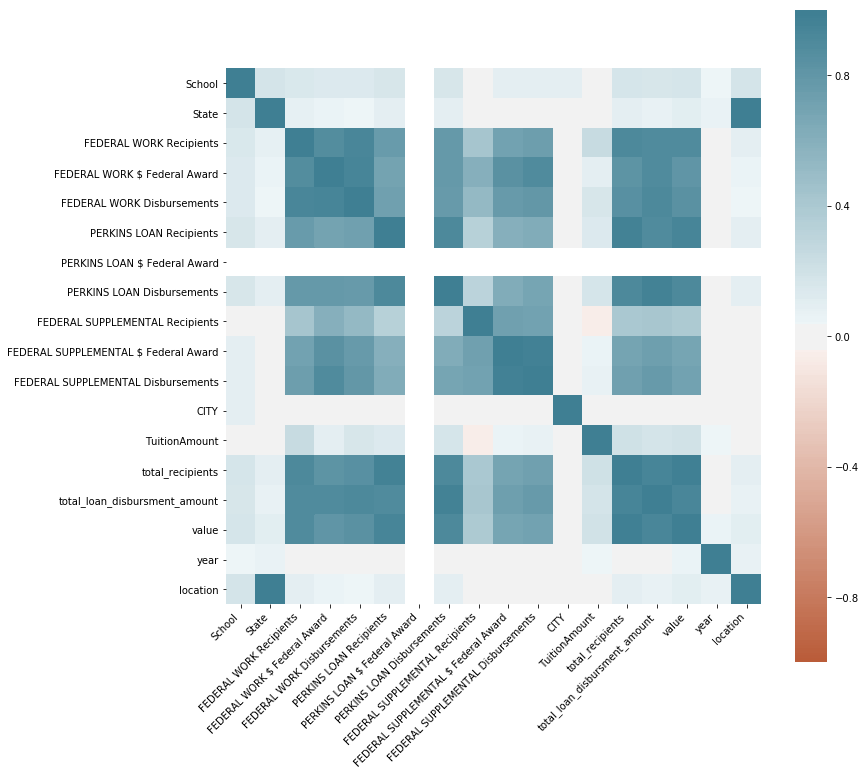

In [502]:
import seaborn as sns
from matplotlib import pyplot
import seaborn
a4_dims = (12, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
corr = scaled_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(24, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [504]:
# from sklearn.preprocessing import PolynomialFeatures 
# def get_polynominal_data(df):
#     poly = PolynomialFeatures(degree = 2) 
#     X_poly = poly.fit_transform(df) 
#     return pd.DataFrame(X_poly)


# REMOVE VARABLES BASED ON CORRELATIONS
scaled_data = scaled_data.drop(['FEDERAL SUPPLEMENTAL Recipients','FEDERAL WORK $ Federal Award',\
                 'FEDERAL SUPPLEMENTAL $ Federal Award','year'], axis=1) 

<h1> Model Selection</h1>

<h2> Linear Regression and MLP Regression to predict the depression</h2>

In [505]:
def get_MSE(y_true,y_pred):
    return np.square(np.subtract(y_true,y_pred)).mean()

In [514]:
from sklearn.model_selection import train_test_split

x_cols = list(df.columns)
x_cols.remove('value')
X = df[x_cols]
y = df['value']

Index(['School', 'State', 'School Type', 'FEDERAL WORK Recipients',
       'FEDERAL WORK Disbursements', 'PERKINS LOAN Recipients',
       'PERKINS LOAN $ Federal Award', 'PERKINS LOAN Disbursements',
       'FEDERAL SUPPLEMENTAL Disbursements', 'CITY', 'TuitionAmount',
       'total_recipients', 'total_loan_disbursment_amount', 'year',
       'location'],
      dtype='object')

In [507]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

def ML_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    predictions = regr.predict(X_test)
    lr_mse = get_MSE(y_test,predictions)
    lr_r2 = r2_score(y_test,predictions)
    
    mlp = MLPRegressor(hidden_layer_sizes=(30, 30, 30), max_iter=1000)
    mlp.fit(X_train, y_train)
    predictions = mlp.predict(X_test)
    mlp_mse = get_MSE(y_test,predictions)
    mlp_r2 = r2_score(y_test,predictions)
    return lr_mse, lr_r2, mlp_mse, mlp_r2

lr_mse, lr_r2, mlp_mse, mlp_r2 = ML_model(X,y)
print("The MSE and R2 for Linear Regression :")
print(lr_mse, lr_r2)
print("The MSE and R2 for MLP Regerssor :")
print(mlp_mse, mlp_r2)

The MSE and R2 for Linear Regression :
4.429070912832398e-05 0.9942666264902662
The MSE and R2 for MLP Regerssor :
0.06119005403580002 -6.9209712775558145


In [ ]:
X_temp = X
pca = decomposition.PCA(n_components=3)
pca.fit(X_temp)
X_temp = pca.transform(X_temp)

In [516]:
from sklearn import decomposition
lr_mse_list =[]
mlp_mse_list = []
for i in range(10):
    X_temp = X
    pca = decomposition.PCA(n_components=i)
    pca.fit(X_temp)
    X_temp = pca.transform(X_temp)
    lr_mse, lr_r2, mlp_mse, mlp_r2 = ML_model(X_temp,y)
    lr_mse_list.append(lr_mse)
    mlp_mse_list.append(mlp_mse)

ValueError: Found array with 0 feature(s) (shape=(6397, 0)) while a minimum of 1 is required.